In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [2]:
def ngon_coords(verts):
    radians=[]
    for k in range(verts):
        rad = (2*np.pi*k)/verts
        radians.append(rad)
    x_vals = np.cos(radians)
    y_vals =np.sin(radians)
    return x_vals, y_vals

<IPython.core.display.Javascript object>


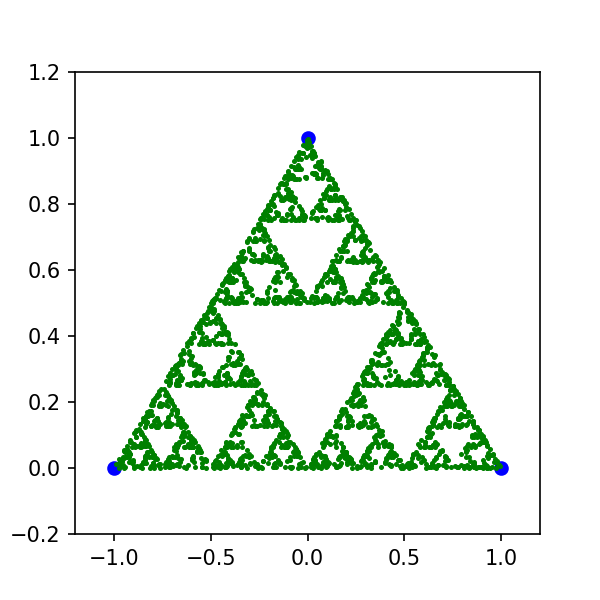

In [3]:
%matplotlib notebook
verts = 3
points = 3000
#x_vals, y_vals = ngon_coords(verts)
x_vals = np.array([-1, 0, 1])
y_vals = np.array([0, 1, 0])
vert_coords = np.column_stack((x_vals, y_vals))
xmin = x_vals.min() - 0.2
xmax = x_vals.max() + 0.2
ymin = y_vals.min() - 0.2
ymax = y_vals.max() + 0.2
#c is starting coordinate
c = np.array([0.5, 0.5])

#initiate figure instance
fig, ax = plt.subplots(figsize=(4, 4))
ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))
scat, = ax.plot([],[])
"""
ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))
ax.scatter(x=0.5, y=0.5, s=2, c='r', label='inital point')
ax.scatter(x_vals, y_vals, c='b', label='vertices')
"""
def init_frame():
    global ax
    ax.cla()
    ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))
    ax.scatter(x=0.5, y=0.5, s=2, c='r', label='inital point')
    ax.scatter(x_vals, y_vals, c='b', label='vertices')
    #for i, xy in enumerate(zip(x_vals, y_vals)):
        #ax.annotate(f'{i}', xy, xycoords='data', xytext=xy, textcoords='offset points')
        
rng = np.random.default_rng()
coords = [c]
randints = rng.integers(0, verts, points)
chunks = 20
frame_chunks = points // chunks
for i in randints:
    coords.append((coords[-1] + vert_coords[i])/2)
def animation(i):
    i_from = i * chunks
    # are we on the last frame?
    if i_from + chunks > len(coords) - 1:
        i_to = len(coords) - 1
    else:
        i_to = i_from + chunks
    rows = coords[i_from:i_to]
    x, y = zip(*rows)
    ax.scatter(x, y, s=2, c='g')
    
ani = FuncAnimation(fig, animation, frames=frame_chunks, init_func=init_frame, interval=5, repeat=True, blit=True)
#from IPython.display import HTML
#HTML(ani.to_jshtml())

In [4]:
def chaos_game(verts=3, points=1000, seed='Default'):
    radians=[]
    for k in range(verts):
        rad = (2*np.pi*k)/verts
        radians.append(rad)
    x_vals = np.cos(radians)
    y_vals =np.sin(radians)
    vert_coords = np.column_stack((x_vals, y_vals))
    xmin = x_vals.min() - 1
    xmax = x_vals.max() + 1
    ymin = y_vals.min() - 1
    ymax = y_vals.max() + 1
    #initiate figure instance
    fig, ax = plt.subplots(figsize=(4, 4))   
    ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))
    #c is starting coordinate
    c = np.array([0, 0])
    def init_frame():
        ax.scatter(x=0, y=0, c='r', label='inital point')
        ax.scatter(x_vals, y_vals, c='b', label='vertices')
        for i, xy in enumerate(zip(x_vals, y_vals)):
            ax.annotate(f'{i}', xy)

    if seed == 'Default':
        seed = 53282428636466080477856163127741301476
    ss = np.random.SeedSequence(seed)
    rng = np.random.default_rng(ss)
    randints = rng.integers(0, verts, points)
    def animation(i):
        c = (c + vert_coords[i])/2
        ax.scatter(c[0], c[1], c='k')
    ani = FuncAnimation(fig, animation, frames=randints, init_func=init_frame, interval=10, repeat=True)
    ax.plot()
    return fig, ax, ani

In [5]:
def chaos_game(vert_coords, points, rng):
    c = np.array([0, 0])
    n = 0
    rows, cols = vert_coords.shape
    if n < points:
        nextint = rng.integers(0, rows)
        c = (c + vert_coords[n])/2
        n += 1
        yield c
    else:
        raise StopIteration

In [10]:
def animation(i):
    try:
        point = ax.scatter(coord[0], coord[1], c='k')
        return point
    except StopIteration:
        return
    
ani = FuncAnimation(fig, animation, frames=chaos_game(vert_coords, points, rng), init_func=init_frame, interval=10, repeat=True)
ani.to_jshtml()

NameError: name 'coord' is not defined